# Test with permutations the significance of a classification score
- 순열을 사용해 교차 검증 점수의 유의성을 평가하기 위해 `permutation_test_score`를 사용하는 방법

## Dataset

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [2]:
import numpy as np

n_uncorrelated_features = 20
rng = np.random.RandomState(seed=0)
# iris와 동일한 수의 샘플 및 20개의 피처 사용
X_rand = rng.normal(size=(X.shape[0], n_uncorrelated_features))

## Permutation test score

In [3]:
from sklearn.model_selection import StratifiedKFold, permutation_test_score
from sklearn.svm import SVC

clf = SVC(kernel="linear", random_state=7)
cv = StratifiedKFold(2, shuffle=True, random_state=0)

score_iris, perm_scores_iris, pvalue_iris = permutation_test_score(
    clf, X, y, scoring="accuracy", cv=cv, n_permutations=1000
)

score_rand, perm_scores_rand, pvalue_rand = permutation_test_score(
    clf, X_rand, y, scoring="accuracy", cv=cv, n_permutations=1000
)

### Original data

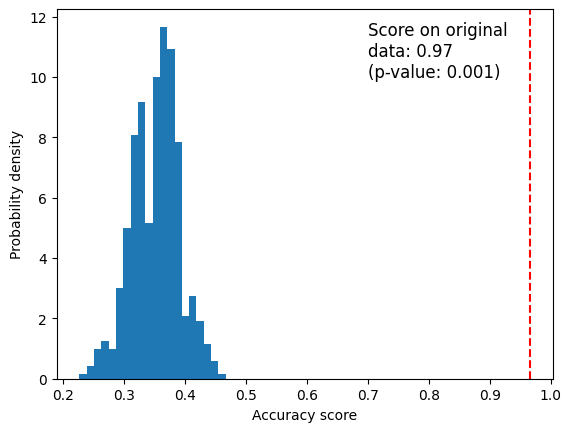

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(perm_scores_iris, bins=20, density=True)
ax.axvline(score_iris, ls="--", color="r")
score_label = f"Score on original\ndata: {score_iris:.2f}\n(p-value: {pvalue_iris:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability density")

### Random data

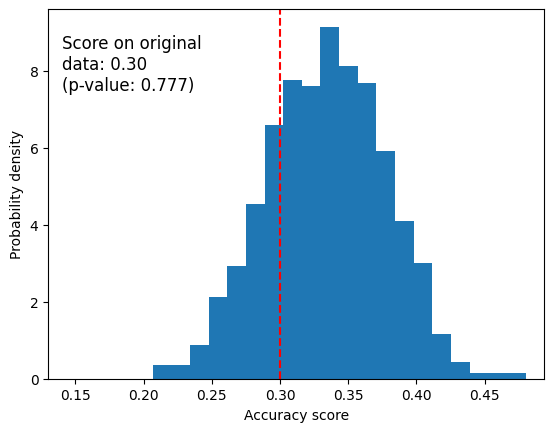

In [5]:
fig, ax = plt.subplots()

ax.hist(perm_scores_rand, bins=20, density=True)
ax.set_xlim(0.13)
ax.axvline(score_rand, ls="--", color="r")
score_label = f"Score on original\ndata: {score_rand:.2f}\n(p-value: {pvalue_rand:.3f})"
ax.text(0.14, 7.5, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
ax.set_ylabel("Probability density")
plt.show()